# Insper - Modelagem e Simulação do Mundo Físico

## Projeto 2 - Modelagem do Resfriamento da Água 

----

### Introdução

<center>
<div>
<img/>
</div>
</center>
<center>

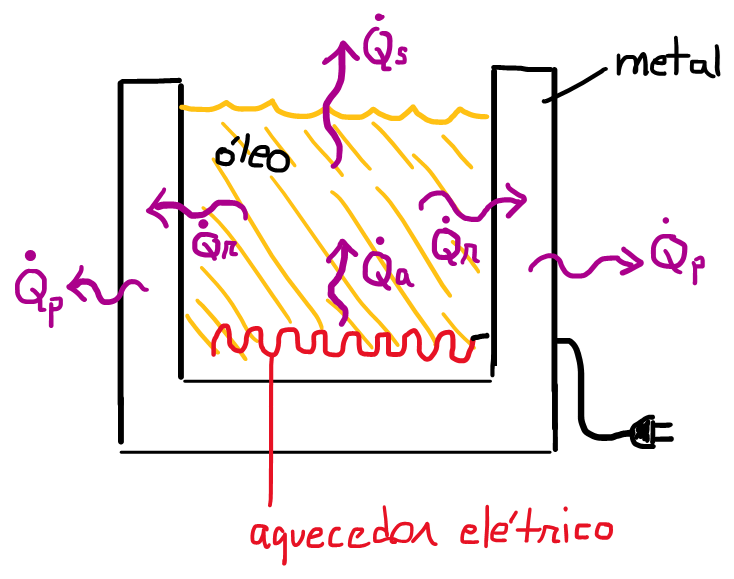

In [65]:
# Importa bibliotecas necessárias
from scipy.integrate import odeint
from math import *
import numpy as np
import matplotlib.pyplot as plt

----

### Item 1 - Dados experimentais


#### a) Importação

Suponha, para efeitos didáticos, que tenhamos medido efetivamente a temperatura num tonel gigante cheio de óleo. Observe o código abaixo. Nele, declaramos duas listas com os dados medidos de tempo e temperatura do óleo.

In [66]:
# Importa dados experimentais
agua_salgada = [88.47, 85.04, 81.13, 78.69, 76.25, 73.31, 71.36, 69.40, 67.94, 66.47, 64.52, 63.05, 61.58, 60.61, 59.14, 58.16, 56.70, 55.72, 55.23, 54.25, 53.27, 52.30, 51.32, 50.34, 49.85, 48.88, 48.39, 47.41, 47.41, 46.92, 46.43, 45.45, 44.97, 44.48, 44.48, 43.50, 43.50, 42.52, 42.03, 41.54, 40.57, 40.08, 40.08, 40.57, 39.59, 39.10, 38.61, 38.61, 38.61, 37.63, 37.15, 37.15, 36.66, 36.66, 36.17, 36.17, 35.68, 35.68, 35.19, 35.68, 35.68, 34.70, 35.19, 34.21, 33.72, 34.21, 33.72, 33.72, 33.72, 33.72, 33.24, 33.24, 33.24, 33.24, 32.75, 32.75, 32.26, 32.26, 31.77, 31.35]
agua_adocada = [84.07, 81.62, 79.18, 76.25, 74.29, 71.36, 69.89, 68.91, 66.47, 65.49, 64.52, 63.05, 62.07, 61.09, 59.63, 59.14, 58.16, 56.70, 56.21, 55.72, 54.74, 53.76, 53.27, 52.30, 51.81, 51.32, 50.34, 49.85, 49.36, 48.88, 48.39, 47.41, 46.92, 46.43, 46.43, 45.94, 44.97, 44.97, 44.48, 43.99, 43.99, 43.50, 43.01, 42.52, 42.52, 42.03, 42.03, 41.06, 40.57, 40.57, 40.57, 40.57, 39.59, 39.59, 39.59, 39.10, 39.10, 38.61, 38.12, 38.12, 37.63, 37.63, 37.15, 37.15, 37.15, 36.66, 36.66, 36.66, 36.66, 36.17, 35.68, 35.19, 35.68, 35.68, 35.19, 35.19, 34.70, 34.70, 34.70, 34.21]
agua_pura = [83.09, 79.18, 76.25, 73.80, 70.87, 68.43, 66.96, 64.52, 63.05, 61.58, 60.12, 58.65, 57.67, 56.21, 55.72, 54.74, 53.27, 51.81, 50.83, 50.83, 49.85, 48.88, 48.39, 47.41, 46.92, 45.94, 45.45, 44.97, 43.50, 43.99, 43.50, 42.52, 42.52, 41.54, 41.54, 41.54, 40.08, 40.08, 39.59, 39.59, 39.10, 39.10, 38.12, 38.12, 37.63, 37.15, 36.66, 36.66, 36.17, 36.17, 35.68, 35.68, 35.68, 35.19, 35.68, 35.68, 34.70, 34.21, 34.21, 34.70, 33.72, 33.72, 33.72, 33.72, 32.75, 32.75, 32.75, 32.75, 32.26, 32.26, 31.77, 31.77, 32.26, 31.28, 31.77, 31.28, 31.28, 31.28, 30.79, 30.51]

tempo_pura = np.arange(60, (len(agua_pura)+1)*60, 60)/3600
tempo_salgada = np.arange(60, (len(agua_pura)+1)*60, 60)/3600
tempo_adocada = np.arange(60, (len(agua_adocada)+1)*60, 60)/3600


----

### Item 2 - 1ª Iteração

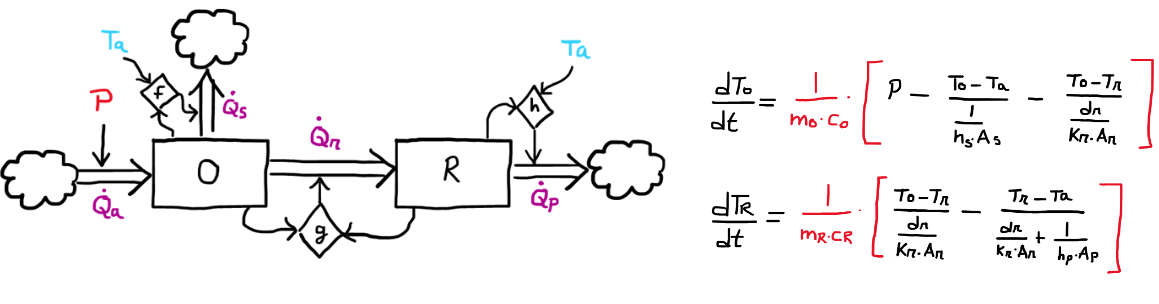

#### a) Parâmetros



In [67]:
# Declara os parâmetros do modelo

Ta = 30 + 273.15 # Temperatura do ambiente [K]
har = 24 # coeficiente de convectividade do ar []

kr = 1.5 # coeficiente de condutividade do recipiente [W/(m*K)]

ml = 0.2 # massa do liguido [kg]
mr = 0.309 # massa do recipiente [kg] (caneca da toca)

cr = 1050 # calor específico do recipiente [J/(kg*K)]

H = 0.097 # altura do recipiente [m]
ri = 0.078/2 # raio interno do recipiente [m]
re = 0.081/2 # raio externo do recipiente [m]
ri_e = (ri+re)/2 #0.0795 # raio intermediario do recipiente [m]

Asup = pi*(ri**2) # área da superfície do líquido [m²]
Al = 2*pi*re*H # área da superfície lateral do recipiente [m²]

emissividade = 0.95 # emissividade de todos os materiais (simplificação)
sigma = 5.6703e-8 # Constante de Stefan-Boltzman (W/(m2.K4))

In [68]:
def coef_acucar (T):
    lista_coef_acucar= [3950, 3960, 3970, 3970, 3980, 3990, 4000, 4000, 4010]
    coef=0
    if T>=20 and T<30:
        coef= lista_coef_acucar[0]
    elif T>=30 and T<40:
        coef= lista_coef_acucar[1]
    elif T>=40 and T<50:
        coef= lista_coef_acucar[2]
    elif T>=50 and T<60:
        coef= lista_coef_acucar[3]
    elif T>60 and T<70:
        coef= lista_coef_acucar[4]
    elif T>70 and T<80:
        coef= lista_coef_acucar[5]
    elif T>80 and T<90:
        coef= lista_coef_acucar[6]
    elif T>90 and T<100:
        coef= lista_coef_acucar[7]
    elif T>=100:
        coef= lista_coef_acucar[8]
    return coef

#### b) Modelo


In [69]:
def modelo1(x, t):
    Tl = x[0]
    Tr = x[1]

    Qlsup = (Tl - Ta)*har*Asup
    Qlr = (Tl - Tr)/((log(ri_e/ri))/(2*pi*H*kr))
    Qrsup = (Tr - Ta)/((1/(har*Al)) + ((log(re/ri_e))/(2*pi*H*kr)))
    Qilsup = emissividade*sigma*Asup*(Tl**4)
    Qirsup = emissividade*sigma*Al*(Tr**4)

    cl = 3600 # calor específico do líquido [J/(kg*K)] água salgada com 12% de sal

    dUl_dt = - Qlsup - Qlr # - Qilsup
    dTl_dt = dUl_dt/(cl*ml)

    dUr_dt = Qlr - Qrsup # - Qirsup
    dTr_dt = dUr_dt/(cr*mr)

    return [dTl_dt, dTr_dt]

In [70]:
def modelo2(x, t):
    Tl = x[0]
    Tr = x[1]

    Qlsup = (Tl - Ta)*har*Asup
    Qlr = (Tl - Tr)/((log(ri_e/ri))/(2*pi*H*kr))
    Qrsup = (Tr - Ta)/((1/(har*Al)) + ((log(re/ri_e))/(2*pi*H*kr)))
    Qilsup = emissividade*sigma*Asup*(Tl**4)
    Qirsup = emissividade*sigma*Al*(Tr**4)

    cl = coef_acucar(Tl)

    dUl_dt = - Qlsup - Qlr # - Qilsup
    dTl_dt = dUl_dt/(cl*ml)


    dUr_dt = Qlr - Qrsup # - Qirsup
    dTr_dt = dUr_dt/(cr*mr)

    return [dTl_dt, dTr_dt]

In [71]:
def modelo3(x, t):
    Tl = x[0]
    Tr = x[1]

    Qlsup = (Tl - Ta)*har*Asup
    Qlr = (Tl - Tr)/((log(ri_e/ri))/(2*pi*H*kr))
    Qrsup = (Tr - Ta)/((1/(har*Al)) + ((log(re/ri_e))/(2*pi*H*kr)))
    Qilsup = emissividade*sigma*Asup*(Tl**4)
    Qirsup = emissividade*sigma*Al*(Tr**4)

    cl = 4200 # calor específico do líquido [J/(kg*K)] água salgada com 10% de açúcar

    dUl_dt = - Qlsup - Qlr # - Qilsup
    dTl_dt = dUl_dt/(cl*ml)

    dUr_dt = Qlr - Qrsup # - Qirsup
    dTr_dt = dUr_dt/(cr*mr)

    return [dTl_dt, dTr_dt]

#### c) Implementação


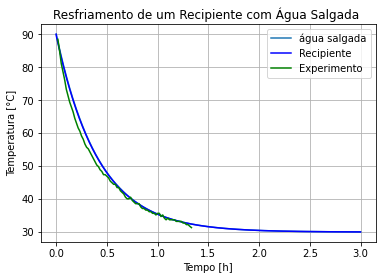

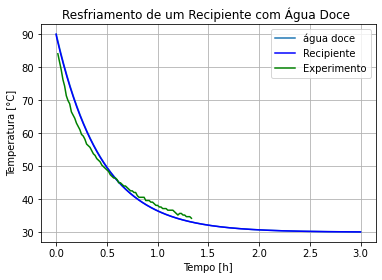

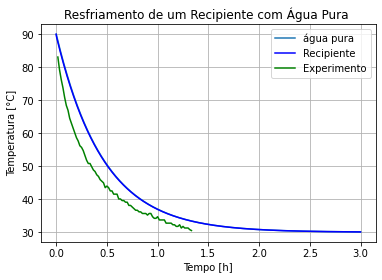

In [72]:
Tmax = 3*60*60 # segundos
dt = 1
tempo_s = np.arange(0, Tmax, dt)
tempo_h = list([t/3600 for t in tempo_s])

X0 = [273.15 + 90, 273.15 + 90] # [Tl_0, Tr_0]

Xy1 = odeint(modelo1, X0, tempo_s)

Tl_y1 = list(Xy1[:,0] - 273.15)
Tr_y1 = list(Xy1[:,1] - 273.15)

plt.plot(tempo_h, Tl_y1, label="água salgada")
plt.plot(tempo_h, Tr_y1, color="blue", label="Recipiente")
plt.plot(tempo_salgada, agua_salgada, color="green", label="Experimento")
plt.title("Resfriamento de um Recipiente com Água Salgada ")
plt.xlabel("Tempo [h]")
plt.ylabel("Temperatura [°C]")
plt.legend()
plt.grid()
plt.show()

Xy2= odeint(modelo2, X0, tempo_s)

Tl_y2= list(Xy2[:,0] - 273.15)
Tr_y2= list(Xy2[:,1] - 273.15)

plt.plot(tempo_h, Tl_y2, label="água doce")
plt.plot(tempo_h, Tr_y2, color= "blue", label= "Recipiente")
plt.plot(tempo_adocada, agua_adocada, color="green", label="Experimento")
plt.title("Resfriamento de um Recipiente com Água Doce ")
plt.xlabel("Tempo [h]")
plt.ylabel("Temperatura [°C]")
plt.legend()
plt.grid()
plt.show()

Xy3= odeint(modelo3, X0, tempo_s)

Tl_y3= list(Xy3[:,0] - 273.15)
Tr_y3= list(Xy3[:,1] - 273.15)

plt.plot(tempo_h, Tl_y3, label="água pura")
plt.plot(tempo_h, Tr_y3, color= "blue", label= "Recipiente")
plt.plot(tempo_pura, agua_pura, color="green", label="Experimento")
plt.title("Resfriamento de um Recipiente com Água Pura ")
plt.xlabel("Tempo [h]")
plt.ylabel("Temperatura [°C]")
plt.legend()
plt.grid()
plt.show()